In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
%matplotlib inline
plt.style.use('ggplot')
sb.set_style('whitegrid')
sb.set_palette('viridis')

In [4]:
store = pd.read_excel('SuperStoreData-200106-055048.xlsx')

In [14]:
store.head(0)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [28]:
store.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [31]:
store['Ship Date'].value_counts()

2015-12-16    35
2017-09-26    34
2017-12-06    32
2017-11-21    32
2017-09-06    30
              ..
2015-02-16     1
2014-03-04     1
2015-07-18     1
2014-07-10     1
2015-06-26     1
Name: Ship Date, Length: 1334, dtype: int64

In [60]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [64]:
store['Order Year'] = store['Order ID'].apply(lambda x:x.split('-')[1])

In [66]:
store['Order Country']= store['Order ID'].apply(lambda x:x.split('-')[0])

In [72]:
store['Order ID']= store['Order ID'].apply(lambda x:x.split('-')[2])

In [74]:
store['Order Country'].value_counts()

CA    8308
US    1686
Name: Order Country, dtype: int64

In [75]:
store['Order Country'] = pd.get_dummies(store['Order Country'], drop_first= True)

In [78]:
from sklearn.preprocessing import OrdinalEncoder

In [79]:
ordi = OrdinalEncoder()

In [82]:
store['Order Year'].value_counts()

2017    3319
2016    2580
2015    2102
2014    1993
Name: Order Year, dtype: int64

In [83]:
store['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [86]:
store['Ship Mode'] = pd.get_dummies(store['Ship Mode'], drop_first=True)

In [88]:
store['Customer ID'].value_counts()

WB-21850    37
MA-17560    34
JL-15835    34
PP-18955    34
JD-15895    32
            ..
JR-15700     1
LD-16855     1
RE-19405     1
AO-10810     1
CJ-11875     1
Name: Customer ID, Length: 793, dtype: int64

In [99]:
store['Segment'].value_counts()

0    6974
1    3020
Name: Segment, dtype: int64

In [98]:
store['Segment'] = pd.get_dummies(store['Segment'], drop_first= True)

In [101]:
store['City'] = pd.get_dummies(store['City'],drop_first= True)

In [103]:
store['State'] = pd.get_dummies(store['State'], drop_first= True)

In [105]:
store['Region'] = pd.get_dummies(store['Region'], drop_first= True)

In [110]:
store['Prod'] = store['Product ID'].apply(lambda x:x.split('-')[0])

In [116]:
store['Prod1'] = store['Product ID'].apply(lambda x:x.split('-')[1])

In [119]:
store['Product ID'] = store['Product ID'].apply(lambda x:x.split('-')[2])

In [120]:
store['Prod'] = pd.get_dummies(store['Prod'], drop_first= True)

In [121]:
store['Prod1'] = pd.get_dummies(store['Prod1'], drop_first= True)

In [122]:
store['Product ID'] = pd.get_dummies(store['Product ID'], drop_first= True)

In [127]:
store['Sub-Category'] = pd.get_dummies(store['Sub-Category'], drop_first= True)

In [136]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   uint8         
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   uint8         
 8   Country        9994 non-null   object        
 9   City           9994 non-null   uint8         
 10  State          9994 non-null   uint8         
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   uint8         
 13  Product ID     9994 non-null   uint8         
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [135]:
store['Order Year'] = pd.get_dummies(store['Order Year'], drop_first= True)

In [139]:
store['Customer ID']

0       CG-12520
1       CG-12520
2       DV-13045
3       SO-20335
4       SO-20335
          ...   
9989    TB-21400
9990    DB-13060
9991    DB-13060
9992    DB-13060
9993    CC-12220
Name: Customer ID, Length: 9994, dtype: object

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
store.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Order Year',
       'Order Country', 'Prod', 'Prod1'],
      dtype='object')

In [146]:
X = store.drop(['Row ID', 'Order ID', 'Postal Code','Order Date', 'Ship Date', 'Customer ID','Customer Name','Country', 'Category','Product Name','Profit'], axis= 1)
y = store['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [149]:
from sklearn.tree import DecisionTreeRegressor

In [150]:
dtr = DecisionTreeRegressor()

In [151]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [152]:
pred = dtr.predict(X_test)

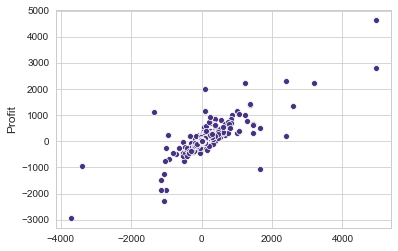

In [154]:
sb.scatterplot(pred, y_test)

In [155]:
from sklearn.metrics import mean_squared_error

In [156]:
rmse = np.sqrt(mean_squared_error(y_test,pred))

In [157]:
rmse

140.27289334485977

In [158]:
from sklearn.ensemble import RandomForestRegressor

In [161]:
rfr = RandomForestRegressor(n_estimators= 300)

In [162]:
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [163]:
f_pred = rfr.predict(X_test)

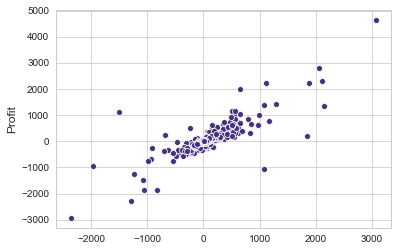

In [164]:
sb.scatterplot(f_pred, y_test)

In [165]:
rmse = np.sqrt(mean_squared_error(y_test,f_pred))

In [166]:
rmse

109.40953510703326

In [167]:
from sklearn.linear_model import LinearRegression

In [168]:
lin = LinearRegression()

In [169]:
lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [170]:
l_pred = lin.predict(X_test)

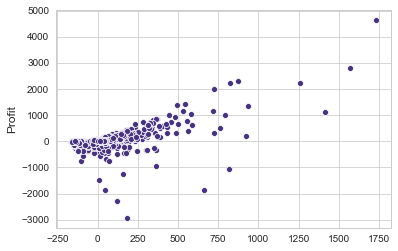

In [171]:
sb.scatterplot(l_pred, y_test)

In [172]:
rmse = np.sqrt(mean_squared_error(y_test,l_pred))

In [173]:
rmse

159.70737804034408

In [174]:
from sklearn.neighbors import KNeighborsRegressor

In [184]:
knn = KNeighborsRegressor(n_neighbors= 11)

In [181]:
error = []

In [182]:
for i in range(1,50):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    k_pred = knn.predict(X_test)
    error.append(np.sqrt(mean_squared_error(y_test,k_pred)))

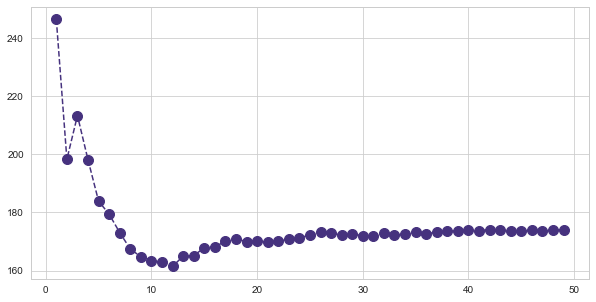

In [183]:
plt.figure(figsize= (10,5))
plt.plot(range(1,50), error, markersize = 10, marker = 'o', ls ='--')

In [185]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='uniform')

In [186]:
kk_pred = knn.predict(X_test)

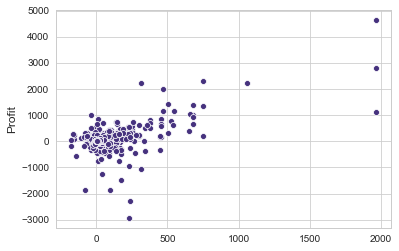

In [187]:
sb.scatterplot(kk_pred, y_test)

In [188]:
rmse = np.sqrt(mean_squared_error(y_test,kk_pred))

In [189]:
rmse

162.88540563248122